In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

import warnings
warnings.filterwarnings('ignore')

**Data Collection:**

In [2]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\dataset.csv\\dataset.csv")

**Description of data**

In [3]:
print('The columns of the dataset are:\n')
df.columns

The columns of the dataset are:



Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'date'],
      dtype='object')

In [4]:
# top 5 records:
df.head(5)

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [5]:
# Summary statistics of dataset
df.describe()

,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [6]:
# datatypes of all the columns:
df.dtypes

Unnamed: 0       int64
open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
timestamp       object
crypto_name     object
date            object
dtype: object

**Data Preprocessing:**

In [7]:
# check Null Values:
df.isna().sum()

Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

**EDA:**

Remove Unnecessary column:


In [8]:
#In our dataset 'Unnamed: 0' column is not needed , so i drop it.
df= df.drop('Unnamed: 0',axis = 1)

In [9]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date'],
      dtype='object')

In [10]:
df['crypto_name'].value_counts()

crypto_name
Bitcoin                  3248
Litecoin                 3248
XRP                      3157
Dogecoin                 3024
Monero                   2866
Stellar                  2791
Tether                   2582
Ethereum                 2424
Ethereum Classic         2072
Basic Attention Token    1760
EOS                      1730
Bitcoin Cash             1708
BNB                      1706
TRON                     1656
Decentraland             1652
Chainlink                1649
Cardano                  1638
Maker                    1605
Filecoin                 1565
Theta Network            1530
Huobi Token              1513
Ravencoin                1478
Tezos                    1365
VeChain                  1332
Quant                    1325
USD Coin                 1266
Cronos                   1199
Wrapped Bitcoin          1152
Cosmos                   1109
Polygon                  1064
OKB                      1062
UNUS SED LEO             1041
Algorand                 101

Univariate Analysis:

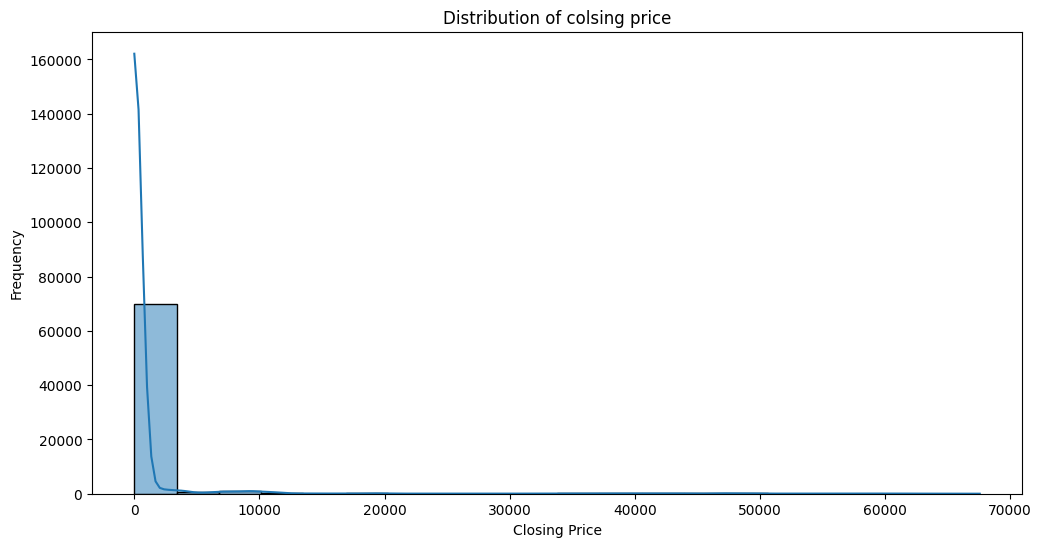

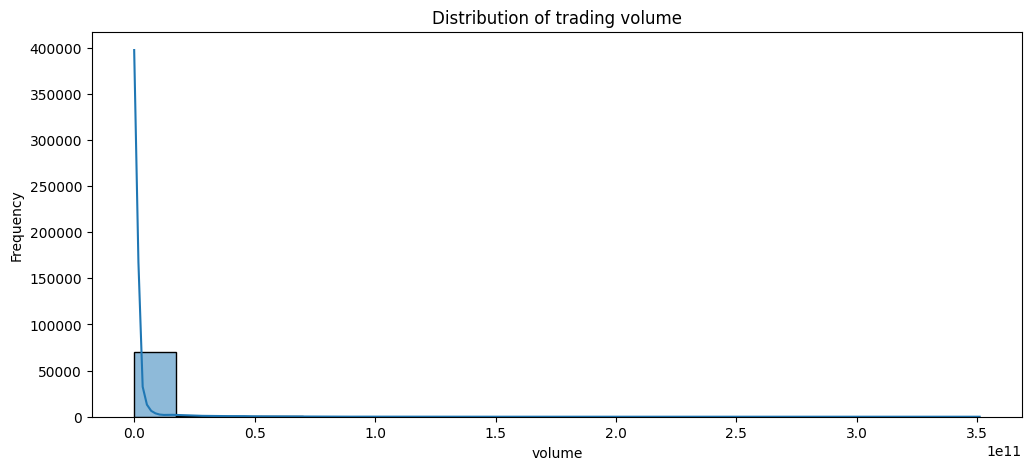

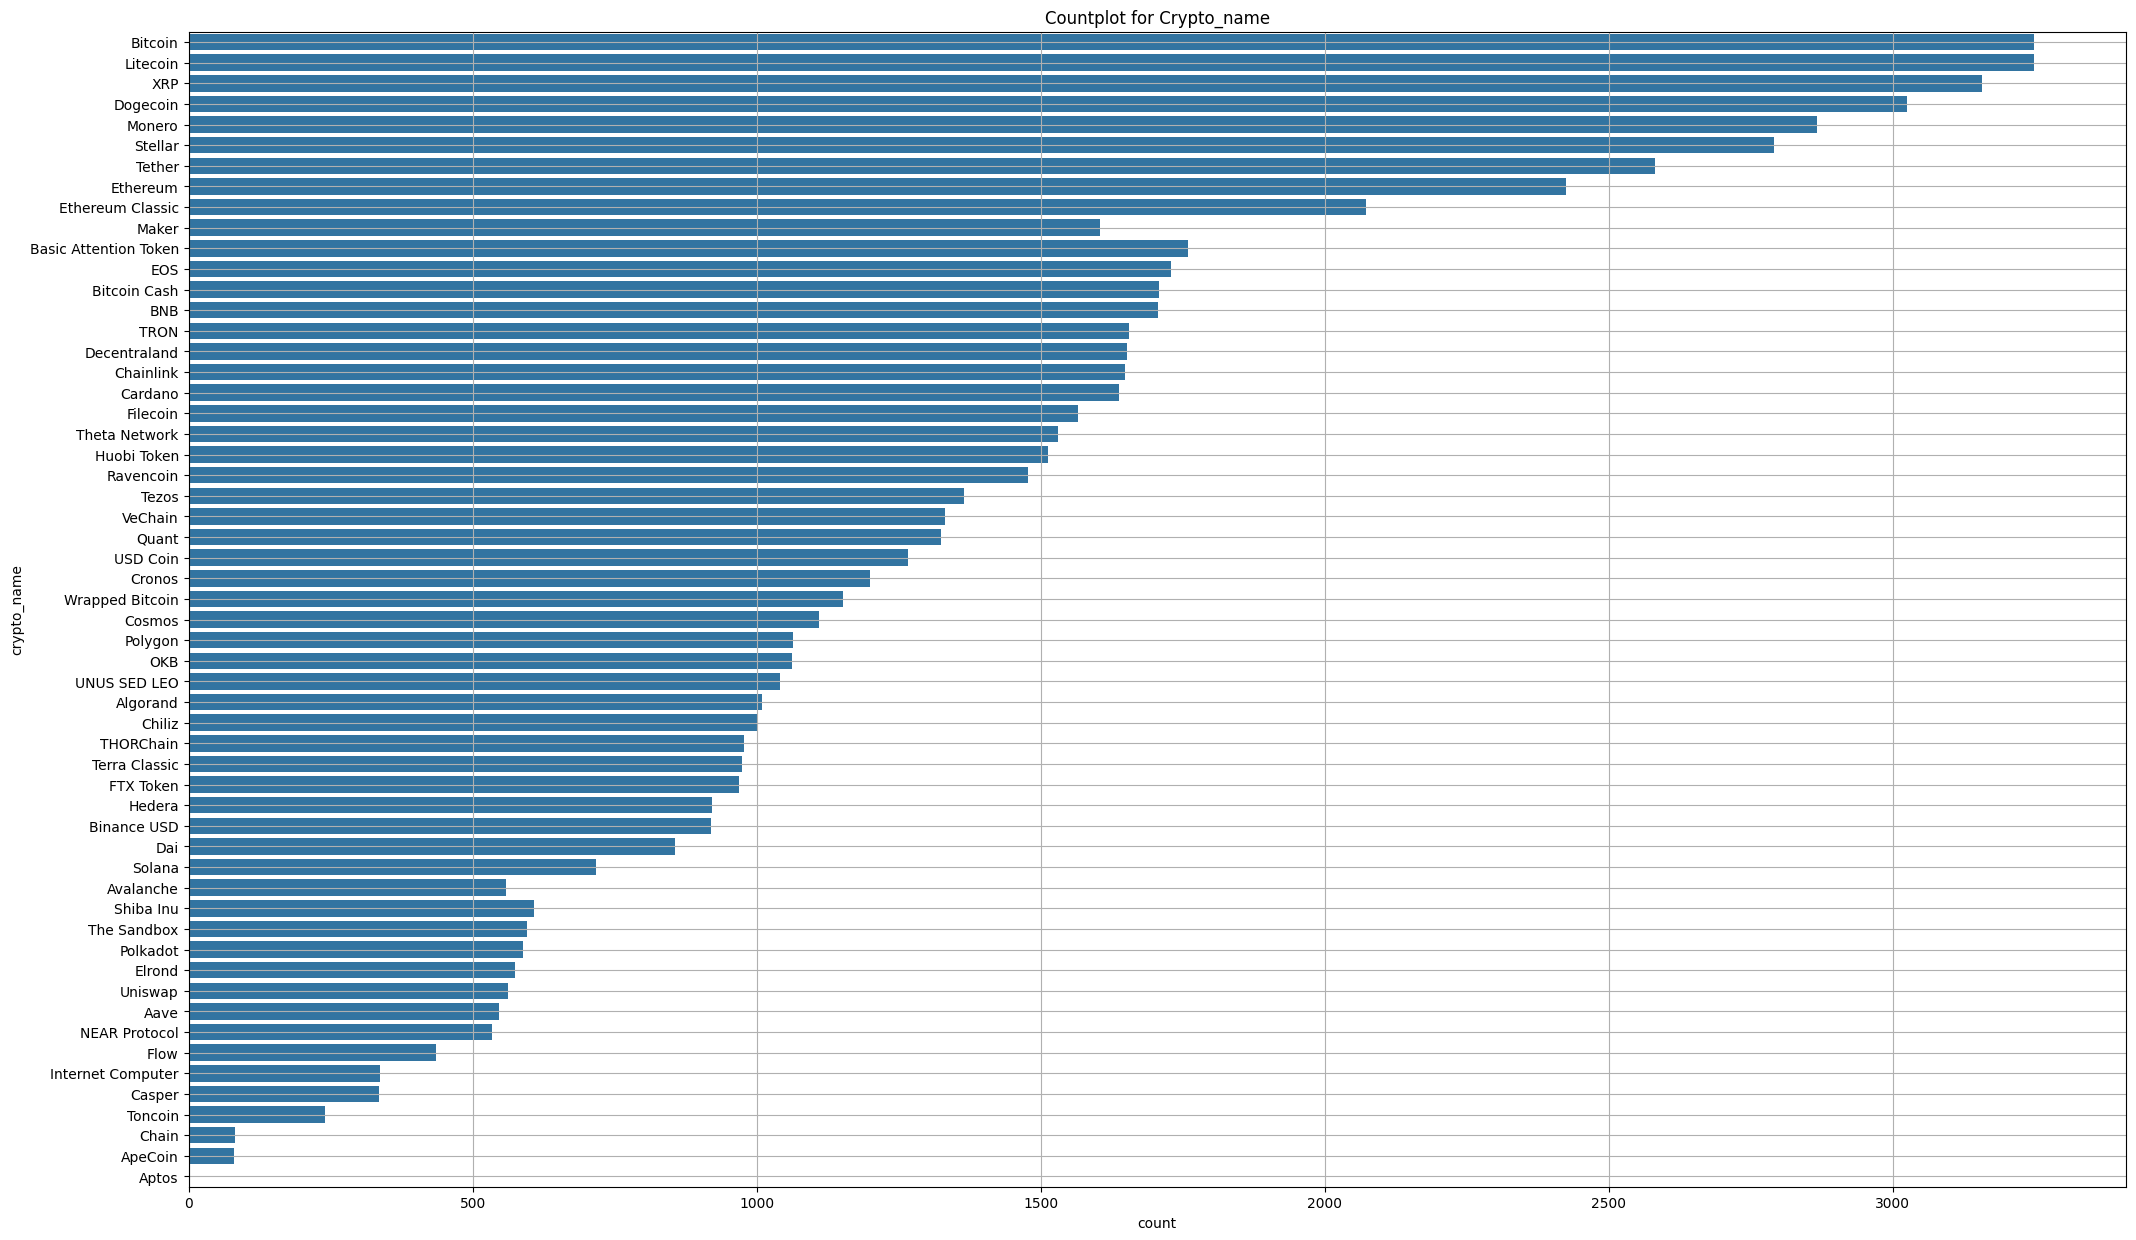

In [11]:
# Distribution of closing price:

plt.figure(figsize=(12,6))
sns.histplot(df['close'], bins = 20, kde= True)
plt.title("Distribution of colsing price")
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of trade volume:

plt.figure(figsize= (12,5))
sns.histplot(df['volume'],kde= True, bins = 20)
plt.title('Distribution of trading volume')
plt.xlabel("volume")
plt.ylabel('Frequency')
plt.show()

# Count of Crypto_name:
plt.figure(figsize= (25,15))
sns.countplot(df['crypto_name'])
plt.title('Countplot for Crypto_name')
plt.grid()
plt.show()

**Multivariate Analysis:**

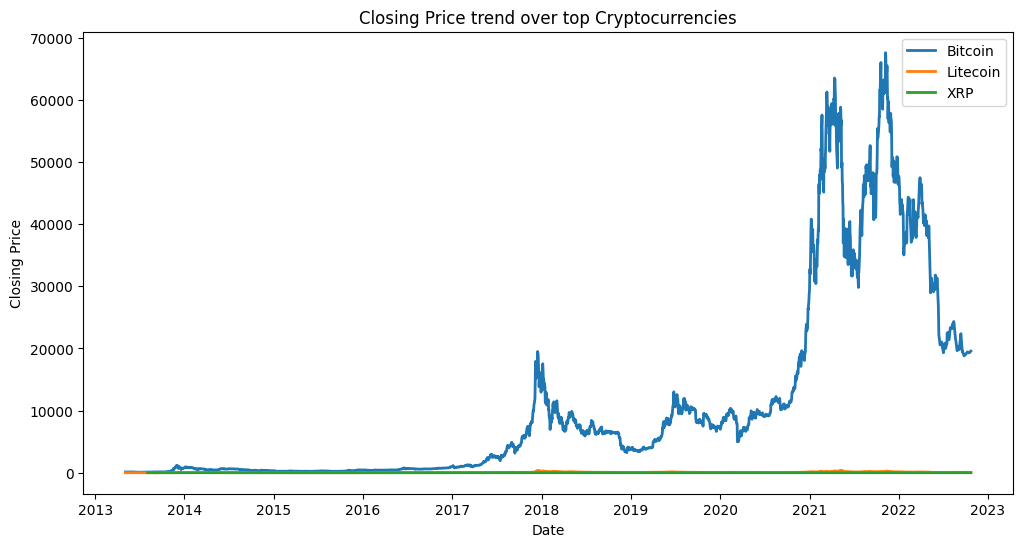

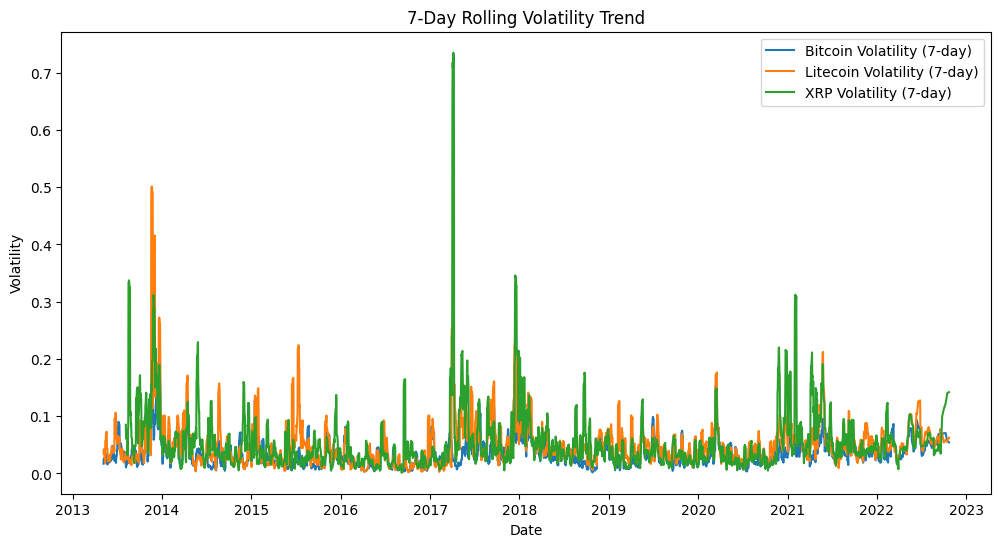

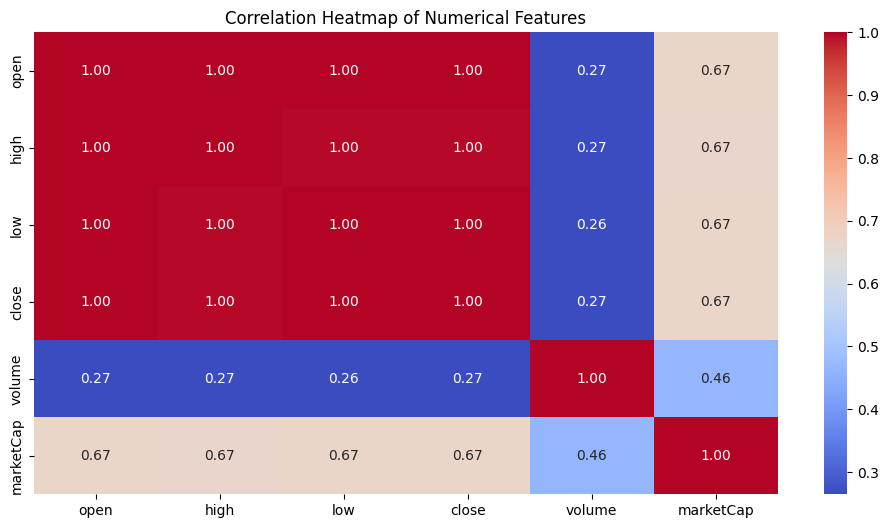

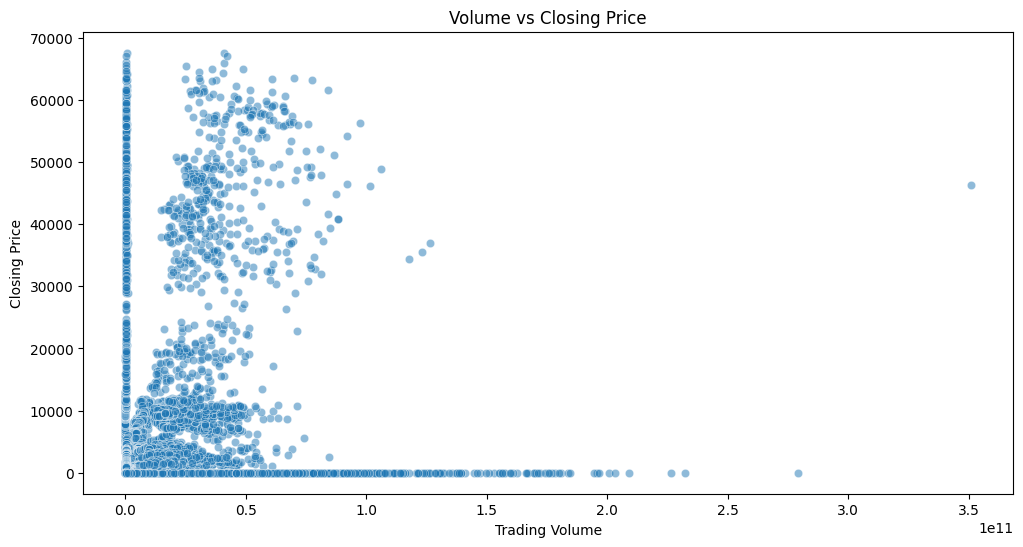

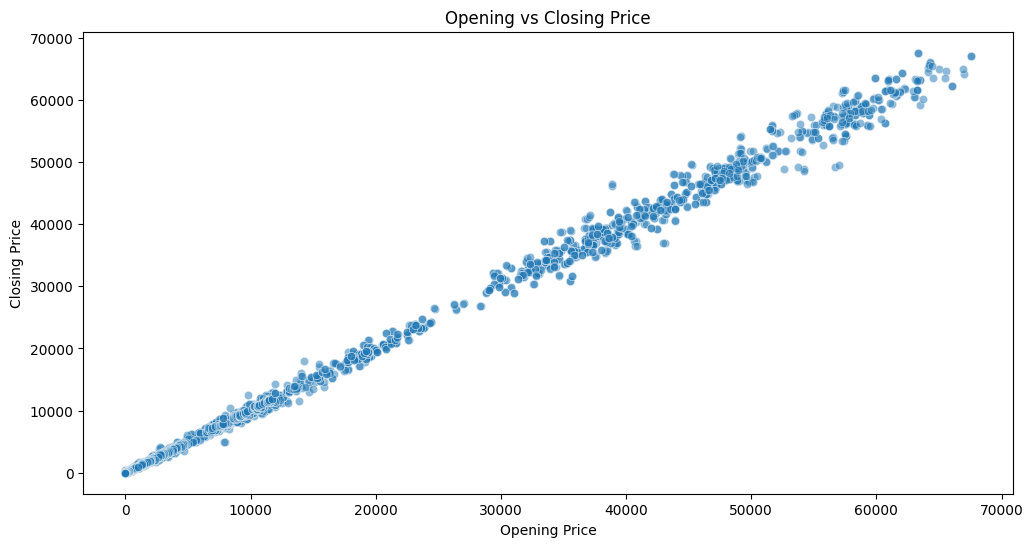


EDA is done


In [12]:
# Price trends over time

# Ensure date is datetime and drop bad dates
df['date'] = pd.to_datetime(df['date'])


# Choose top 3 crypto currency
top_crypto = df['crypto_name'].value_counts().index[:3]

plt.figure(figsize=(12,6))
for name in top_crypto:
  sub = df[df['crypto_name']== name]
  plt.plot(sub['date'], sub['close'],label = name, linewidth=2, linestyle='-')
plt.title('Closing Price trend over top Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Volatility and Returns Visualization

# Calculate daily returns
df['returns'] = df.groupby('crypto_name')['close'].pct_change()

# Rolling 7-day volatility
df['vol_7'] = df.groupby('crypto_name')['returns'].rolling(window=7, min_periods=1).std().reset_index(0, drop=True)

# Plot volatility for top crypto
plt.figure(figsize=(12,6))
for name in top_crypto:
    sub = df[df['crypto_name'] == name]
    plt.plot(sub['date'], sub['vol_7'], label=f"{name} Volatility (7-day)")
plt.title("7-Day Rolling Volatility Trend")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# ----------------------------
# Correlation Analysis
# ----------------------------
num_cols = ['open','high','low','close','volume','marketCap']
plt.figure(figsize=(12,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# ----------------------------
#  Relationship Between Variables
# ----------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x='volume', y='close', data=df, alpha=0.5)
plt.title("Volume vs Closing Price")
plt.xlabel("Trading Volume")
plt.ylabel("Closing Price")
plt.show()

# Relationship between Open and Close price
plt.figure(figsize=(12,6))
sns.scatterplot(x='open', y='close', data=df, alpha=0.5)
plt.title("Opening vs Closing Price")
plt.xlabel("Opening Price")
plt.ylabel("Closing Price")
plt.show()

print('\nEDA is done')

# Feature Engineering:

**Create some new features:**

- Rolling Volatility:
    - Computes standard deviation of returns over 7-day and 30-day windows.

   - Measures short-term and long-term volatility.

   - min_periods=1 allows calculation even if fewer than 7 days exist at the start.

- Moving Avg:
  - Calculates average closing prices over 7 and 30 days.

  - Smooths short-term fluctuations → reveals trend direction.

- Price Range Features:
  - daily_range: difference between daily high and low → how much the price moved within one day.

   - range_ratio: normalizes the range relative to the opening price; a larger ratio = more volatile day.


- Measures market liquidity → how easy it is to buy/sell without big price change.
- Technical Indicators — Bollinger Bands:
  -  Bollinger Bands = technical indicator that measures price volatility.

  - ma_20: 20-day moving average (the “middle band”).

  - std_20: 20-day rolling standard deviation.

  - bb_upper / bb_lower: upper and lower bands (±2 std).

   - bb_width: distance between bands → wide = more volatile, narrow = stable.
 - Average True Range (ATR):
   - ATR = another volatility measure used in trading.

   - shift(1) gets the previous day’s closing price.

   -  Calculates three possible ranges:

      1. High-Low

      2. |High − Previous Close|

      3. |Low − Previous Close|

    - max(axis=1) takes the largest of the three = the True Range for that day.

    - rolling(window=14).mean() computes the 14-day average of True Range = ATR-14.

    - Larger ATR ⇒ higher volatility.
- Terget Variable:
   - Goal: predict tomorrow’s volatility.

   - shift(-1) moves the vol_7 column one row up, so each row’s target corresponds to the next day’s 7-day volatility.

   -  This becomes our Y (dependent variable) for model training.
	​


In [13]:
# Rename column
df.rename(columns={'marketCap': 'market_cap'}, inplace=True)
#  Rolling Volatility (Short & Long Term)

# df['vol_7'] = df.groupby('crypto_name')['returns'].rolling(window=7, min_periods=1).std().reset_index(0, drop=True)
# i already done rolling volatility for 7 days
df['vol_30'] = df.groupby('crypto_name')['returns'].rolling(window=30, min_periods=1).std().reset_index(0, drop=True)

#  Moving Averages (Smoothing)

df['ma_7'] = df.groupby('crypto_name')['close'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)
df['ma_30'] = df.groupby('crypto_name')['close'].rolling(window=30, min_periods=1).mean().reset_index(0, drop=True)

# Price Range Features

df['daily_range'] = df['high'] - df['low']             # intraday spread
df['range_ratio'] = df['daily_range'] / df['open']     # relative daily volatility

#  Liquidity Ratios

df['liquidity_ratio'] = df['volume'] / (df['market_cap'].replace({0: np.nan}).fillna(method='ffill').fillna(1))

#  Technical Indicators — Bollinger Bands

df['ma_20'] = df.groupby('crypto_name')['close'].rolling(window=20, min_periods=1).mean().reset_index(0, drop=True)
df['std_20'] = df.groupby('crypto_name')['close'].rolling(window=20, min_periods=1).std().reset_index(0, drop=True)
df['bb_upper'] = df['ma_20'] + 2 * df['std_20']
df['bb_lower'] = df['ma_20'] - 2 * df['std_20']
df['bb_width'] = df['bb_upper'] - df['bb_lower']

#  Average True Range (ATR)

# ATR measures market volatility based on range of each candle
df['prev_close'] = df.groupby('crypto_name')['close'].shift(1)
df['tr1'] = df['high'] - df['low']
df['tr2'] = abs(df['high'] - df['prev_close'])
df['tr3'] = abs(df['low'] - df['prev_close'])
df['true_range'] = df[['tr1', 'tr2', 'tr3']].max(axis=1)
df['atr_14'] = df.groupby('crypto_name')['true_range'].rolling(window=14, min_periods=1).mean().reset_index(0, drop=True)

#  Target Variable — Next Day Volatility

# Predict next-day volatility (7-day window)
df['target_vol_7_next'] = df.groupby('crypto_name')['vol_7'].shift(-1)

# Drop rows where target is missing (end of each series)
df = df.dropna(subset=['target_vol_7_next']).reset_index(drop=True)

# Final check

print("Feature Engineering Complete!")
print("Total Features Created:", len(df.columns))
display(df.head())

#  Optional: Keep only relevant columns for modeling

feature_cols = [
    'open','high','low','close','volume','market_cap',
    'returns','vol_7','vol_30','ma_7','ma_30',
    'daily_range','range_ratio','liquidity_ratio',
    'bb_width','atr_14'
]
target_col = 'target_vol_7_next'


Feature Engineering Complete!
Total Features Created: 29


,open,high,low,close,volume,market_cap,timestamp,crypto_name,date,returns,...,bb_upper,bb_lower,bb_width,prev_close,tr1,tr2,tr3,true_range,atr_14,target_vol_7_next
0,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,-0.031145,...,119.210315,108.999692,10.210624,115.910004,18.023003,8.752998,9.270004,18.023003,14.840004,0.016985
1,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,-0.061166,...,3.791688,3.170452,0.621236,3.590890,0.665000,0.190130,0.474870,0.665000,0.505700,0.035174
2,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,-0.007124,...,117.935622,108.537716,9.397906,112.300003,15.744003,1.143997,14.600006,15.744003,15.141337,0.024841
3,3.370870,3.406720,2.939790,3.332740,0.0,5.805127e+07,2013-05-07T23:59:59.999Z,Litecoin,2013-05-07,-0.011423,...,3.710154,3.153099,0.557054,3.371250,0.466930,0.035470,0.431460,0.466930,0.492777,0.042293
4,3.283620,3.491120,3.283620,3.409240,0.0,5.950822e+07,2013-05-08T23:59:59.999Z,Litecoin,2013-05-08,0.022954,...,3.654546,3.197514,0.457031,3.332740,0.207500,0.158380,0.049120,0.207500,0.421457,0.035759


## Model Selection, Training & Evaluation:

In [14]:
# Define X(independent features) and y(target)
X = df[feature_cols]
y = df[target_col]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42, shuffle=True)

print(f'Training shape: {X_train.shape}')
print(f'\nTesting shape: {X_test.shape}')

# Normalize Numeric Features:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Save scaler for deployment
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Data scaled successfully")

# Build RandomForestRegressor Model- base model
rf_base = RandomForestRegressor()
#fit the model
rf_base.fit(X_train_scaled, y_train)

# predicion
y_pred_base = rf_base.predict(X_test_scaled)

# Evaluation
def evaluate_model(y_true, y_pred, label="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → MAE: {mae:.3f} | R²: {r2:.2f}")
    return mae,r2

evaluate_model(y_test, y_pred_base, "Base Random Forest")

print(f'\nBuild, Training & Evaluation of Base Random Forest done succesfully.\n')

print('---------------------------------------------------------------------------------------------------------')



Training shape: (50984, 16)

Testing shape: (21851, 16)
Data scaled successfully
Base Random Forest → MAE: 0.014 | R²: 0.64

Build, Training & Evaluation of Base Random Forest done succesfully.

---------------------------------------------------------------------------------------------------------


Fitting 3 folds for each of 36 candidates, totalling 108 fits

 Best Parameters Found:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest → MAE: 0.020 | R²: 0.59


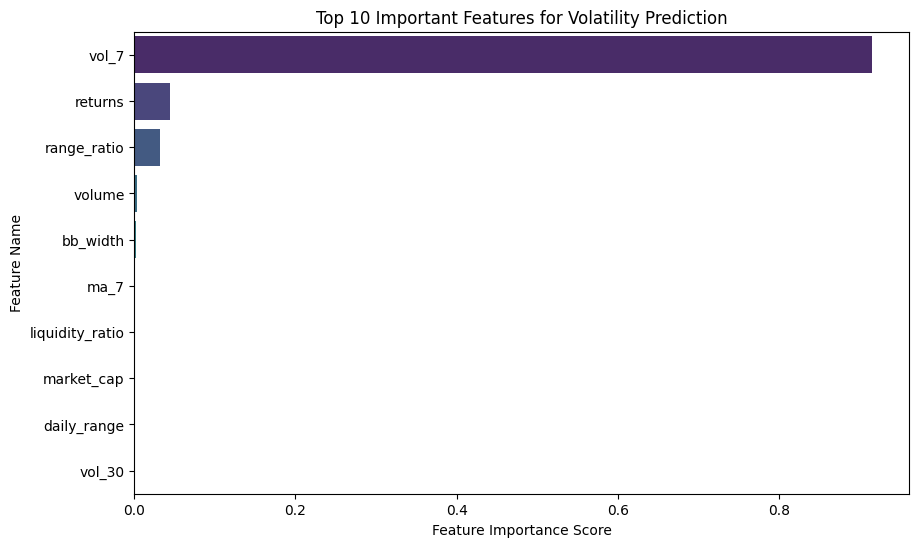


 Model training and tuning complete!


In [15]:
#Hyperparameter Tuning with GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("\n Best Parameters Found:")
print(grid_search.best_params_)

# Train Final Model with Best Parameters

best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)

# Save model
with open("rf_vol_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

#  Evaluate the Tuned Model

y_pred_tuned = best_rf.predict(X_test_scaled)
evaluate_model(y_test, y_pred_tuned, "Tuned Random Forest")

# Feature Importance Visualization

importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette='viridis')
plt.title("Top 10 Important Features for Volatility Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.show()

#  Save Metadata (for Deployment)

metadata = {"features": list(X_train.columns), "scaler": "MinMaxScaler", "model": "RandomForestRegressor"}
with open("model_meta.pkl", "wb") as f:
    pickle.dump(metadata, f)

print("\n Model training and tuning complete!")